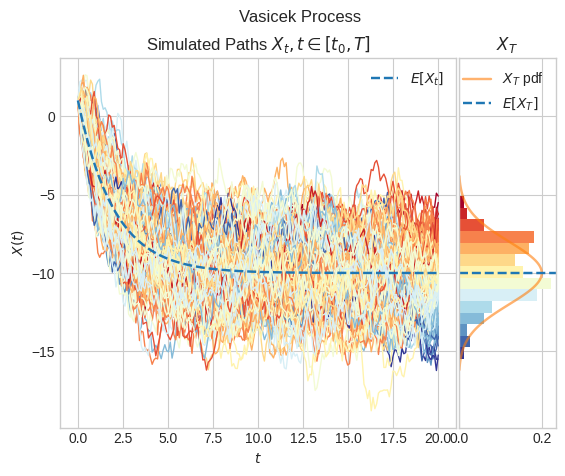

In [34]:
%pip install aleatory
from aleatory.processes import Vasicek
process = Vasicek(theta=0.5, mu=-10.0, sigma=2.0, initial=1.0, T=20.0)
process.draw(n=200, N=200, envelope=False, title='Vasicek Process')
import matplotlib.pyplot as plt
plt.show()

## Definition

The Vasicek model specifies that the instantaneous interest rate is defined by a stochastic process which can be defined by the following Stochastic Differential Equation (SDE)


\begin{equation}
dX_t = \theta (\mu - X_t) dt + \sigma dW_t, \quad t >0,
\end{equation}


with initial condition  $X_0 =x_0\in\mathbb{R}$, and where $W_t$ is a standard Brownian motion, and the three parameters are constants:

- $\theta>0$ : speed or mean reversion coefficient
- $\mu \in \mathbb{R}$ : long term mean
- $\sigma>0$ : volatility



In order to find the solution to this SDE, let us set the function $f(t,x) = x e^{\theta t}$. Then, Ito's formula implies


\begin{align*}
X_te^{\theta t} &= x_0 +\int_0^t X_s \theta e^{\theta s}ds + \int_0^t e^{\theta s}dX_s \\
& = x_0 + \int_0^t \left[ \theta X_s  e^{\theta s}  +\theta e^{\theta s}(\mu - X_s)\right] ds + \int_0^t e^{\theta s}\sigma dW_s\\
& = x_0 + \int_0^t \left[ \theta e^{\theta s}\mu\right] ds + \int_0^t e^{\theta s}\sigma dW_s\\
& = x_0 + \mu(e^{\theta t} - 1) + \int_0^t e^{\theta s}\sigma dW_s.
\end{align*}


Thus

\begin{equation}
X_t = x_0e^{-\theta t} +  \mu(1- e^{-\theta t})  + \sigma \int_0^t e^{-\theta (t-s)}dW_s.
\end{equation}

### Expectation and Variance

For each $t>0$, the conditional marginal $X_t|X_0$ from a Vacisek process satisfies

\begin{equation*}
\mathbf{E} [X_t ] = \mathbb{E}[X_t|X_0] = x_0e^{-\theta t} +  \mu(1- e^{-\theta t}),
\end{equation*}

and

\begin{equation*}
\mathbf{Var} [X_t ] = \mathbb{Var} [X_t |X_0] =  \frac{\sigma^2}{ 2\theta} (1- e^{-2\theta t}).
\end{equation*}

To obtain the expectation we simply use the linearity of the expectation and the fact that the Ito integral in equation (2) is a martingale. Similarly, for the variance we  use basic properties of the variance and the isometry property of the Ito integral.

### Python Implementation

So, for given $x_0, \theta>0, \mu, \sigma>0$ and $t,s>0$ You will implement the above formulas for the expectation, variance, and covariance as follows.

In [35]:
import numpy as np

def expectation(x0, theta, mu, t):
    return x0 * np.exp(-theta * t) + mu * (1 - np.exp(-theta * t))

def variance(theta, sigma, t):
    return (sigma**2 / (2 * theta)) * (1 - np.exp(-2 * theta * t))

def covariance(theta, sigma, t, s):
    return (sigma**2 / (2 * theta)) * np.exp(-theta *np.abs(t - s)) * (1 - np.exp(-2 * theta *min(t,s)))


### Marginal Distributions in Python

Knowing the distribution –with its corresponding parameters– of the marginal distributions allows us to reproduce them with `Python`.

One way to do this is by using the object  `norm`  from the library `scipy.stats`.  The next cell shows how to create $X_1$ using this method.

In [36]:
from scipy.stats import norm
import numpy as np
#### Calculate Mean and Varaince of Normal Distribution with initial values of X0,mu,sigma,t
mean_x = expectation(1.0,-10.0,0.5,20.0)
var_x = variance(2.0,0.5,10)
std_x = np.sqrt(var_x)
#
simulated = norm.rvs(loc=mean_x, scale=std_x, size=1000)

print(f"Mean of X_t: {mean_x}")
print(f"Variance of X_t: {var_x}")
print(f"Simulated X_t (first 10 samples): {simulated[:10]}")

Mean of X_t: 3.6129868840628745e+86
Variance of X_t: 0.0625
Simulated X_t (first 10 samples): [3.61298688e+86 3.61298688e+86 3.61298688e+86 3.61298688e+86
 3.61298688e+86 3.61298688e+86 3.61298688e+86 3.61298688e+86
 3.61298688e+86 3.61298688e+86]


### Probability Density Functions

The probability density function (pdf) of the marginal distribution $X_t$ is given by the following expression
\begin{equation*}
f(x, t; \theta,  \mu, \sigma, x_0) = \dfrac{1}{ \frac{\sigma}{ \sqrt{2\theta}}  \sqrt{ (1- e^{-2\theta t})} \sqrt{2 \pi }}\exp\left\{ -\dfrac{1}{2} \left(\dfrac{x- [x_0e^{-\theta t} +  \mu(1- e^{-\theta t})] }{ \frac{\sigma}{ \sqrt{2\theta}}  \sqrt{ (1- e^{-2\theta t})}}\right)^2  \right\}, \qquad \forall x\in\mathbb{R}, t>0.
\end{equation*}

First we consider the process
`Vasicek(theta=1.0, mu=10.0, sigma=0.5, initial=1.0)` and plot the marginal density of $X_1$.
Note that the mean is still far from the long term mean $\mu=10$. Code it and plot the Graph of Distribution
'''
process = Vasicek(theta=1.0, mu=10.0, sigma=0.5, initial=1.0)
X_1 = process.get_marginal(t=1)
''''

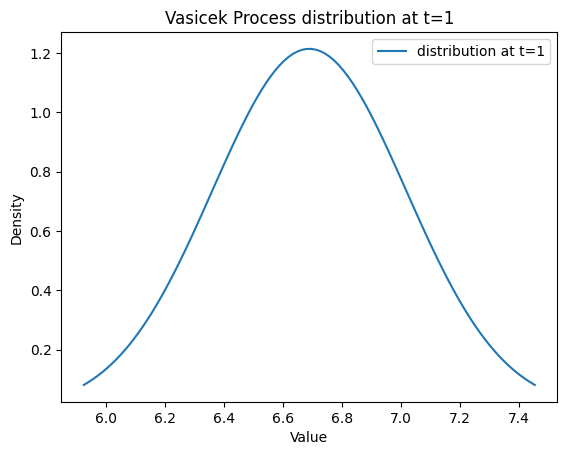

In [37]:
'''process = Vasicek(theta=1.0, mu=10.0, sigma=0.5, initial=1.0)
X_1 = process.get_marginal(t=1)
'''''
##Plot the Graph
process = Vasicek(theta=1.0, mu=10.0, sigma=0.5, initial=1.0)
X_1 = process.get_marginal(t=1)
x_values = np.linspace(X_1.ppf(0.01), X_1.ppf(0.99), 100)
y_values = X_1.pdf(x_values)
##Plot the Graph
plt.plot(x_values,y_values,label='distribution at t=1')
plt.title("Vasicek Process distribution at t=1")
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

**Plot Graphs** Dsitrbution in which Vary one at time ( sigma,mu,theta ,t ) . Vary one value taking  initial values of sigma,mu,theta,t

In [38]:
# Initial Parameters
x0 = 1.0
sigma_init = 0.5
mu_init = 10.0
theta_init = 1.0
t_init = 1.0

x_range = np.linspace(-2, 15, 1000)

def vasicek_pdf(x, x0, theta, mu, sigma, t):
    mean_Xt = x0 * np.exp(-theta * t) + mu * (1 - np.exp(-theta * t))
    var_Xt = (sigma**2 / (2 * theta)) * (1 - np.exp(-2 * theta * t))
    std_Xt = np.sqrt(var_Xt)
    return norm.pdf(x, loc=mean_Xt, scale=std_Xt)

# Plotting Function
def plot_varying_parameter(parameter_name, values, fixed_params):
    plt.figure(figsize=(10, 6))
    for value in values:
        params = fixed_params.copy()
        params[parameter_name] = value
        pdf = vasicek_pdf(x_range, **params)
        plt.plot(x_range, pdf, label=f"{parameter_name} = {value}")

    plt.title(f"Varying {parameter_name.capitalize()} in Vasicek Process", fontsize=14)
    plt.xlabel("$x$", fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()

# Fixed parameters
fixed_params = {
    "x0": x0,
    "theta": theta_init,
    "mu": mu_init,
    "sigma": sigma_init,
    "t": t_init,
}

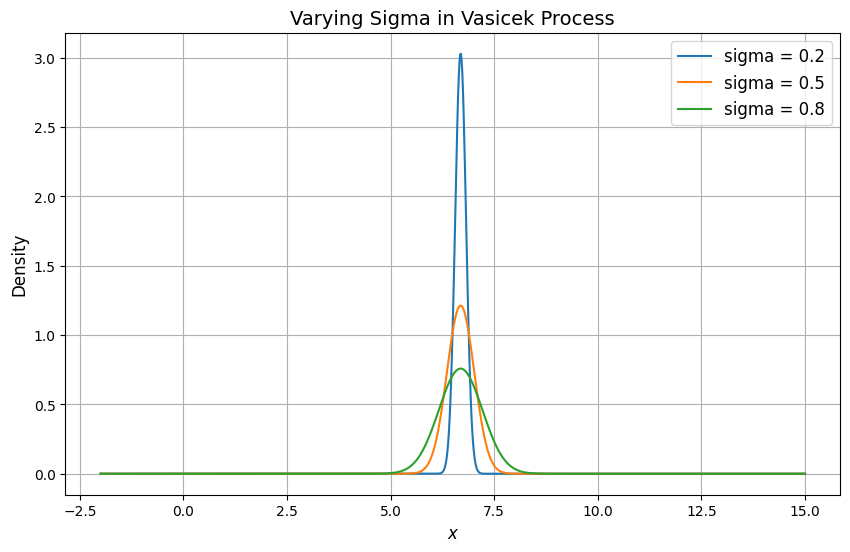

In [39]:
plot_varying_parameter("sigma", [0.2, 0.5, 0.8], fixed_params)

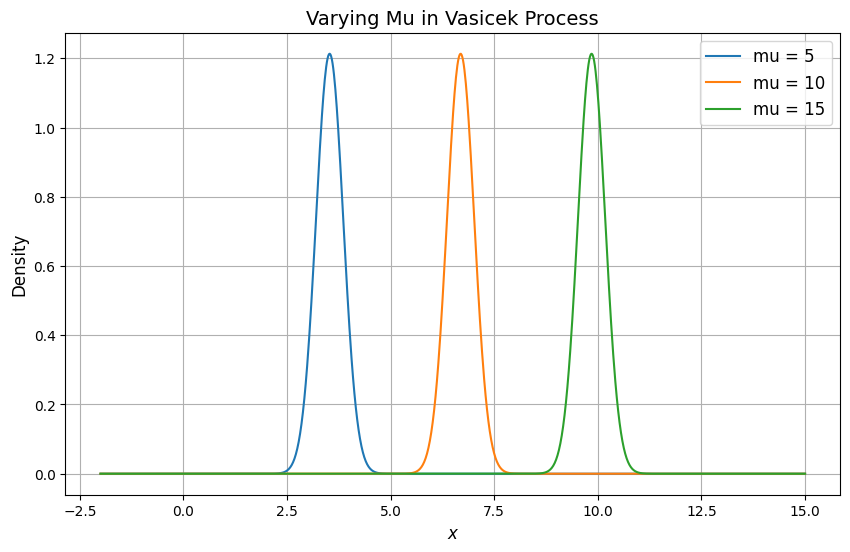

In [40]:
plot_varying_parameter("mu", [5, 10, 15], fixed_params)

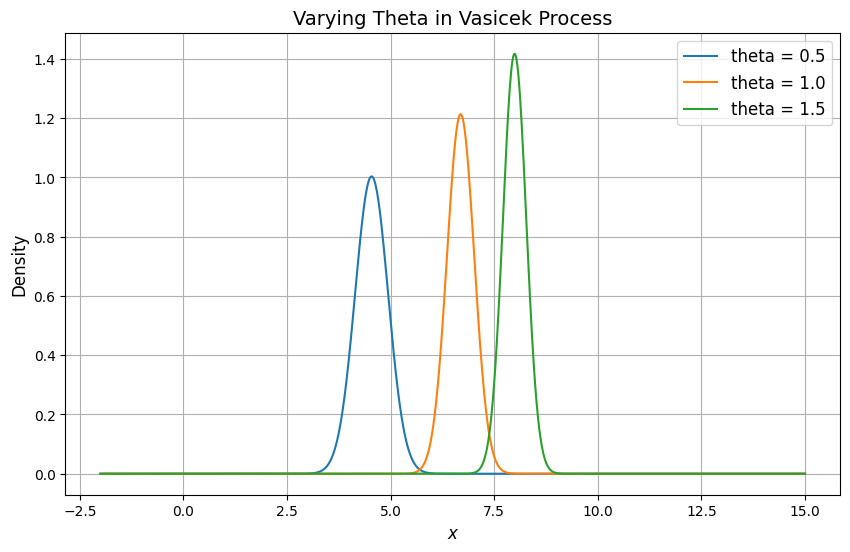

In [41]:
plot_varying_parameter("theta", [0.5, 1.0, 1.5], fixed_params)

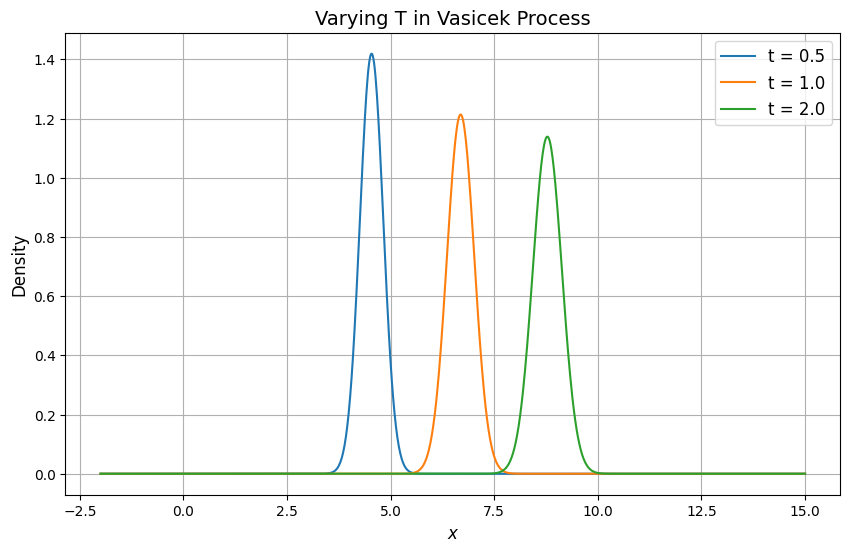

In [42]:
plot_varying_parameter("t", [0.5, 1.0, 2.0], fixed_params)

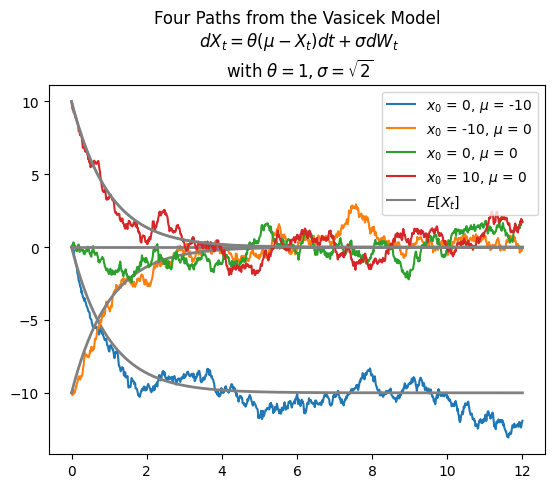

In [43]:
#from aleatory.processes import Vasicek
import matplotlib.pyplot as plt
import numpy as np

process = Vasicek(theta=1.0, mu=-10.0, sigma=np.sqrt(2), initial=0.0, T=12.0)
path = process.simulate(n=1000, N=1)
ts = process.times
exp = process.marginal_expectation(ts)
plt.plot(ts, path[0], label= f'$x_0$ = 0, $\mu$ = -10')
plt.plot(ts, exp, color='grey',linewidth=2)

for x0 in [-10.0, 0.0, 10.0]:
    process = Vasicek(theta=1.0, mu=0.0, sigma=np.sqrt(2), initial=x0, T=12.0)
    path = process.simulate(n=1000, N=1)
    plt.plot(ts, path[0], label= f'$x_0$ = {x0:.0f}, $\mu$ = 0')
    exp = process.marginal_expectation(ts)
    plt.plot(ts, exp, color='grey', linewidth=2)
plt.plot(ts, exp, color='grey', label=f'$E[X_t]$')
plt.legend()
plt.title('Four Paths from the Vasicek Model\n $dX_t = \\theta(\mu - X_t) dt + \sigma dW_t$\n with $\\theta = 1, \sigma = \sqrt{2}$')
plt.show()

**Simulation**

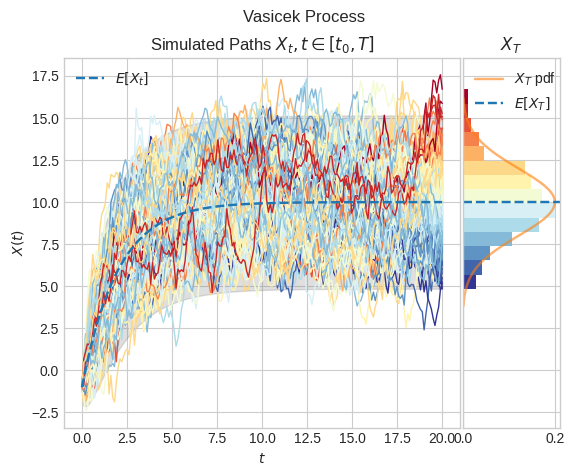

In [44]:
process = Vasicek(theta=0.5, mu=10.0, sigma=2.0, initial=-1.0, T=20.0)
fig = process.draw(n=200, N=200, envelope=True)

#### The parameter $\theta$ determines the Speed of Convergence

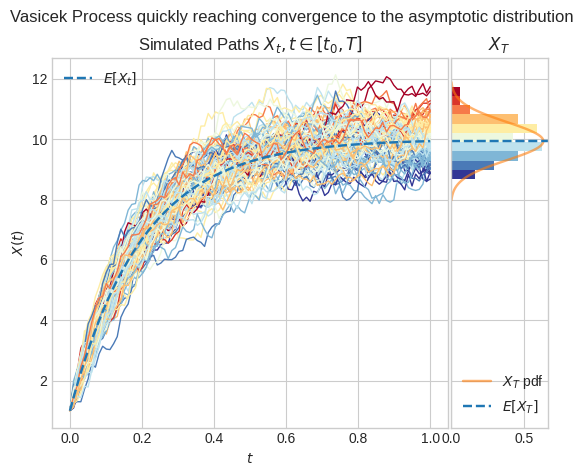

In [45]:
# from aleatory.processes import Vasicek
process = Vasicek(theta=5.0, mu=10.0, sigma=2.0, initial=1.0, T=1.0)
fig = process.draw(n=100, N=100, title='Vasicek Process quickly reaching convergence to the asymptotic distribution')

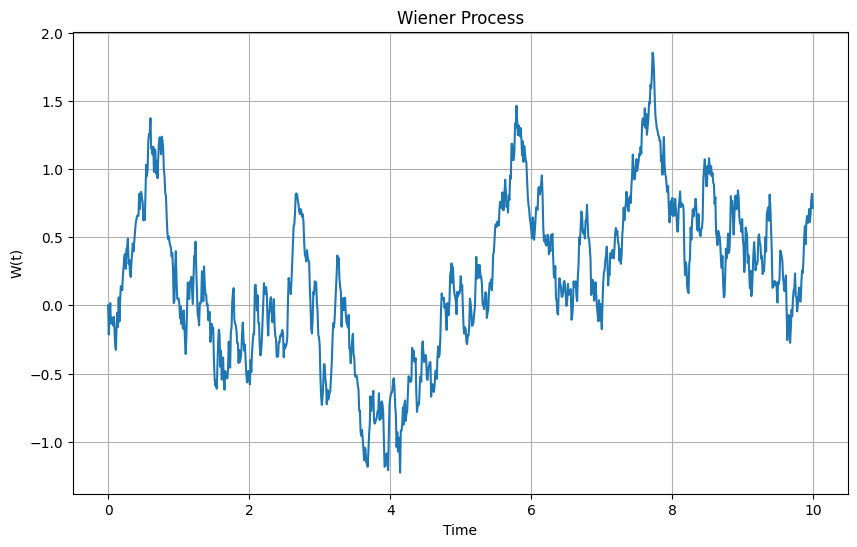

In [46]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_wiener_process(num_points, dt):
    # Generate the increments using normal distribution
    increments = np.random.normal(0, np.sqrt(dt), num_points - 1)

    # The Wiener process starts at zero, so we concatenate a 0 at the beginning
    W = np.concatenate([[0], np.cumsum(increments)])

    return W

# Simulation parameters
num_points = 1000
dt = 0.01

W = simulate_wiener_process(num_points, dt)

# Plotting the Wiener process
plt.figure(figsize=(10, 6))
plt.plot(np.arange(num_points) * dt, W)
plt.title('Wiener Process')
plt.xlabel('Time')
plt.ylabel('W(t)')
plt.grid(True)
plt.show()

#Plot different no. of paths by varying parameter and time interval!

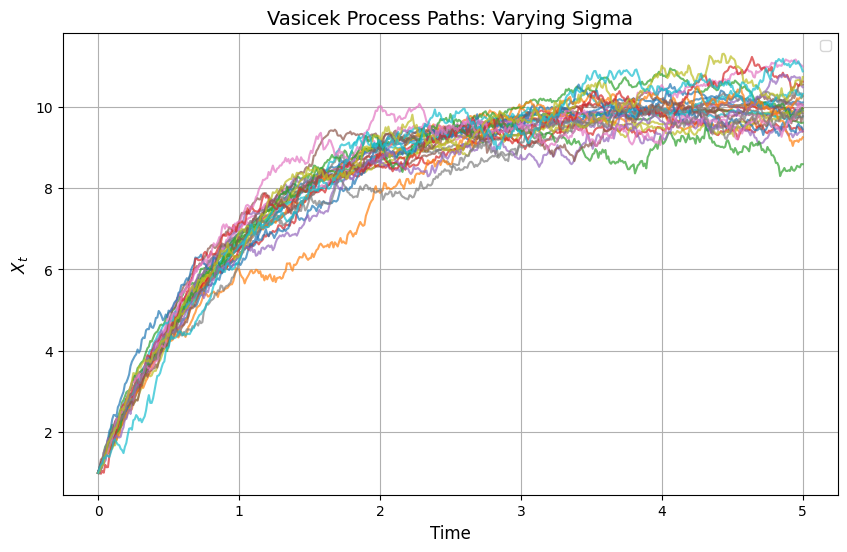

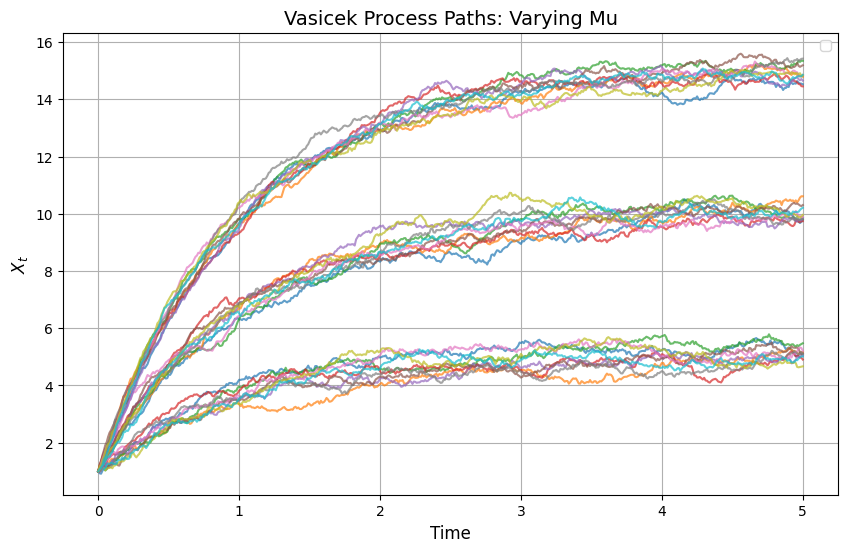

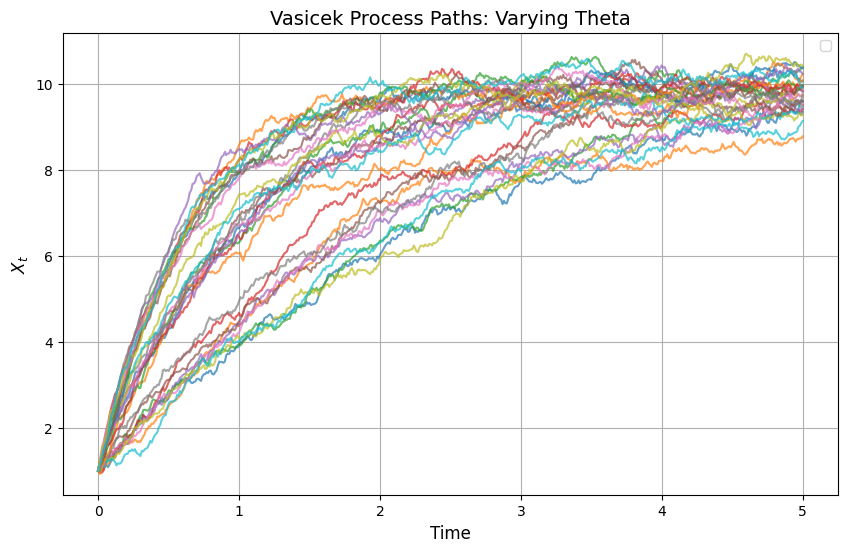

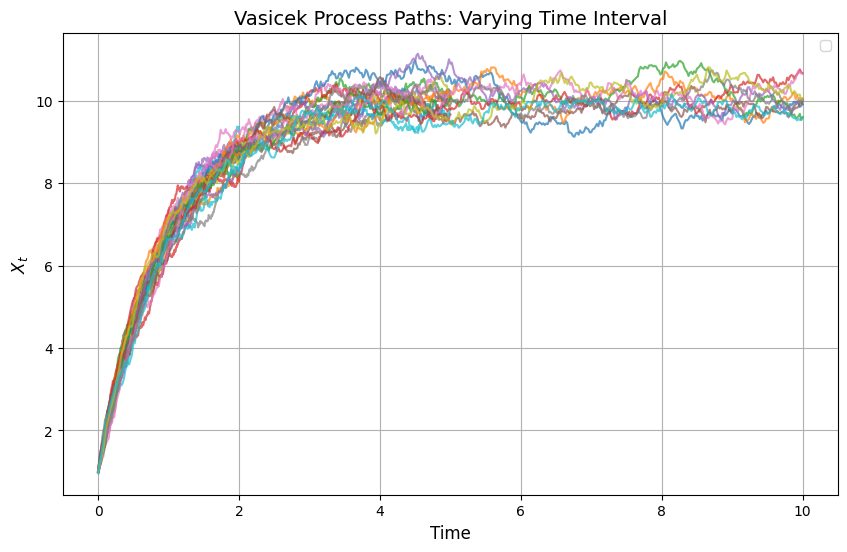

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate Vasicek paths
def simulate_vasicek_paths(x0, theta, mu, sigma, T, N, paths):
    dt = T / N
    time = np.linspace(0, T, N + 1)
    paths_matrix = np.zeros((paths, N + 1))
    paths_matrix[:, 0] = x0

    for i in range(1, N + 1):
        dW = np.random.normal(0, np.sqrt(dt), size=paths)
        paths_matrix[:, i] = (
            paths_matrix[:, i - 1]
            + theta * (mu - paths_matrix[:, i - 1]) * dt
            + sigma * dW
        )
    return time, paths_matrix

# Plot paths for varying parameters
def plot_varying_paths(param_name, values, fixed_params, T, N, paths):
    plt.figure(figsize=(10, 6))
    for value in values:
        params = fixed_params.copy()
        params[param_name] = value
        time, simulated_paths = simulate_vasicek_paths(
            params["x0"], params["theta"], params["mu"],
            params["sigma"], T, N, paths
        )
        for path in simulated_paths:
            plt.plot(time, path, alpha=0.7, label=f"{param_name}={value}" if path is simulated_paths[0] else "")

    plt.title(f"Vasicek Process Paths: Varying {param_name.capitalize()}", fontsize=14)
    plt.xlabel("Time", fontsize=12)
    plt.ylabel("$X_t$", fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True)
    plt.show()

# Fixed parameters
fixed_params = {
    "x0": 1.0,
    "theta": 1.0,
    "mu": 10.0,
    "sigma": 0.5,
}

T = 5.0
N = 500
paths = 10

# 1. Vary sigma
plot_varying_paths("sigma", [0.2, 0.5, 0.8], fixed_params, T, N, paths)

# 2. Vary mu
plot_varying_paths("mu", [5, 10, 15], fixed_params, T, N, paths)

# 3. Vary theta
plot_varying_paths("theta", [0.5, 1.0, 1.5], fixed_params, T, N, paths)

time_intervals = [2, 5, 10]
plt.figure(figsize=(10, 6))
for T_var in time_intervals:
    time, simulated_paths = simulate_vasicek_paths(
        fixed_params["x0"], fixed_params["theta"], fixed_params["mu"],
        fixed_params["sigma"], T_var, N, paths
    )
    for path in simulated_paths:
        plt.plot(time, path, alpha=0.7, label=f"T={T_var}" if path is simulated_paths[0] else "")

plt.title("Vasicek Process Paths: Varying Time Interval", fontsize=14)
plt.xlabel("Time", fontsize=12)
plt.ylabel("$X_t$", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()
